<a href="https://colab.research.google.com/github/MariaVlasenkova/repo-PNM/blob/main/%D0%9A%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C_%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D0%B9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загрузка библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# загрузка данных в colab
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
# загрузка датасета в датафрейм Pandas
df_magazin = pd.read_csv("Mall_Customers.csv")

In [ ]:
# первичный анализ данных: типизация
df_magazin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# визуальный анализ данных и выявление проблем
df_magazin.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# визуальный анализ данных и выявление проблем
df_magazin.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# 2.1. Seaborn

<AxesSubplot:xlabel='Age'>

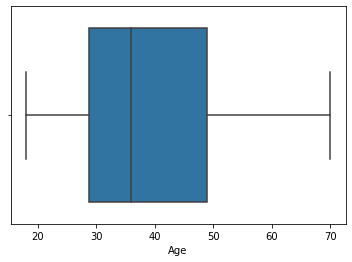

In [ ]:
# Box plots
sns.boxplot(df_magazin['Age'])

<AxesSubplot:>

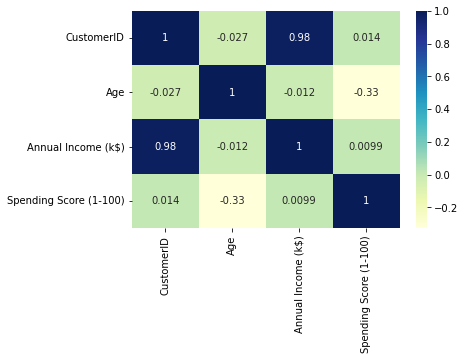

In [ ]:
# Heatmap
sns.heatmap(df_magazin.corr(),annot=True,cmap='YlGnBu')

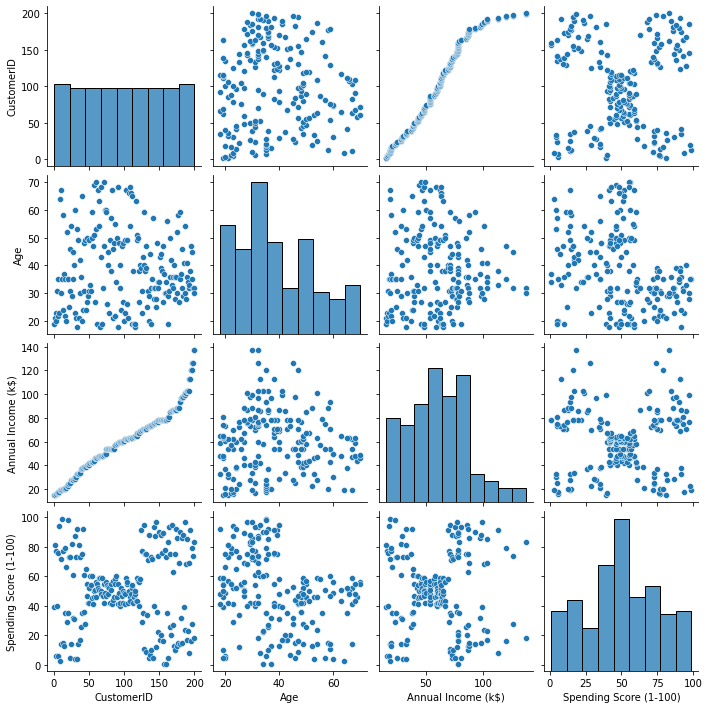

In [ ]:
# Pair plot
sns.pairplot(data=df_magazin)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

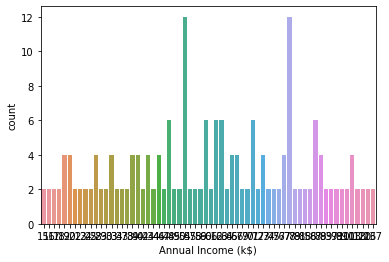

In [ ]:
# Count plots
sns.countplot(df_magazin['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

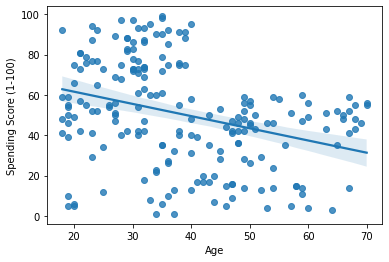

In [ ]:
# Regplot
sns.regplot(x='Age', y='Spending Score (1-100)', data=df_magazin)

# 2.2. Методы статистического анализа данных. Проверка нормальности данных

In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url="https://ru.wikipedia.org/wiki/Список_самых_кассовых_фильмов_в_России"
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df.head()

,№,Название,"Кассовые сборы, ₽",Зрители,Год,Прим.
0,1,Чебурашка,6 879 893 358,21 181 461,2023,[# 1]
1,2,Аватар,3 516 796 661,13 466 217,2009,[# 2]
2,3,Холоп,3 073 864 075,11 636 735,2019,[# 3]
3,4,Человек-паук: Нет пути домой,2 987 157 478,8 978 243,2021,[# 4]
4,5,Движение вверх,2 970 588 767,12 020 021,2017,[# 5]


In [ ]:
print(df.to_string())

      №                                                 Название Кассовые сборы, ₽     Зрители   Год    Прим.
0     1                                                Чебурашка     6 879 893 358  21 181 461  2023    [# 1]
1     2                                                   Аватар     3 516 796 661  13 466 217  2009    [# 2]
2     3                                                    Холоп     3 073 864 075  11 636 735  2019    [# 3]
3     4                             Человек-паук: Нет пути домой     2 987 157 478   8 978 243  2021    [# 4]
4     5                                           Движение вверх     2 970 588 767  12 020 021  2017    [# 5]
5     6                                               Король Лев     2 641 791 506  10 902 932  2019    [# 6]
6     7                                          Мстители: Финал     2 594 826 571   8 764 679  2019    [# 7]
7     8                                                     Т-34     2 273 745 807   8 840 748  2018    [# 8]
8     9   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №                  100 non-null    int64 
 1   Название           100 non-null    object
 2   Кассовые сборы, ₽  100 non-null    object
 3   Зрители            100 non-null    object
 4   Год                100 non-null    int64 
 5   Прим.              100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
df['Кассовые сборы, ₽'] = df['Кассовые сборы, ₽'].str.replace(r"\xa0","").str.replace(r" ","").str.replace(r"*","")
df['Зрители'] = df['Зрители'].str.replace(r"\xa0","").str.replace(r" ","").str.replace(r"*","")
df

<ipython-input-6-d077a4242031>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Кассовые сборы, ₽'] = df['Кассовые сборы, ₽'].str.replace(r"\xa0","").str.replace(r" ","").str.replace(r"*","")
<ipython-input-6-d077a4242031>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Кассовые сборы, ₽'] = df['Кассовые сборы, ₽'].str.replace(r"\xa0","").str.replace(r" ","").str.replace(r"*","")
<ipython-input-6-d077a4242031>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Зрители'] = df['Зрители'].str.replace(r"\xa0","").str.replace(r" ","").str.replace(r"*","")
<ipython-input-6-d077a4242031>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressi

,№,Название,"Кассовые сборы, ₽",Зрители,Год,Прим.
0,1,Чебурашка,6879893358,21181461,2023,[# 1]
1,2,Аватар,3516796661,13466217,2009,[# 2]
2,3,Холоп,3073864075,11636735,2019,[# 3]
3,4,Человек-паук: Нет пути домой,2987157478,8978243,2021,[# 4]
4,5,Движение вверх,2970588767,12020021,2017,[# 5]
...,...,...,...,...,...,...
95,96,Полицейский с Рублёвки. Новогодний беспредел 2,1039778118,3937512,2019,[# 96]
96,97,Богемская рапсодия,1026860360,3683366,2018,[# 97]
97,98,Выживший,1023448723,3680841,2015,[# 98]
98,99,Гарри Поттер и Дары Смерти. Часть 2,1019246147,4368424,2011,[# 99]


In [ ]:
df['Кассовые сборы, ₽']= df['Кассовые сборы, ₽'].astype('int64')
df['Зрители']=df['Зрители'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №                  100 non-null    int64 
 1   Название           100 non-null    object
 2   Кассовые сборы, ₽  100 non-null    int64 
 3   Зрители            100 non-null    int64 
 4   Год                100 non-null    int64 
 5   Прим.              100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [ ]:
df.drop(['Прим.'],axis=1,inplace=True)
df.drop(['№'],axis=1,inplace=True)
df

,Название,"Кассовые сборы, ₽",Зрители,Год
0,Чебурашка,6879893358,21181461,2023
1,Аватар,3516796661,13466217,2009
2,Холоп,3073864075,11636735,2019
3,Человек-паук: Нет пути домой,2987157478,8978243,2021
4,Движение вверх,2970588767,12020021,2017
...,...,...,...,...
95,Полицейский с Рублёвки. Новогодний беспредел 2,1039778118,3937512,2019
96,Богемская рапсодия,1026860360,3683366,2018
97,Выживший,1023448723,3680841,2015
98,Гарри Поттер и Дары Смерти. Часть 2,1019246147,4368424,2011


In [ ]:
df1=df[['Название','Кассовые сборы, ₽']].sort_values(ascending=False,by='Кассовые сборы, ₽')
df1

,Название,"Кассовые сборы, ₽"
0,Чебурашка,6879893358
1,Аватар,3516796661
2,Холоп,3073864075
3,Человек-паук: Нет пути домой,2987157478
4,Движение вверх,2970588767
...,...,...
95,Полицейский с Рублёвки. Новогодний беспредел 2,1039778118
96,Богемская рапсодия,1026860360
97,Выживший,1023448723
98,Гарри Поттер и Дары Смерти. Часть 2,1019246147


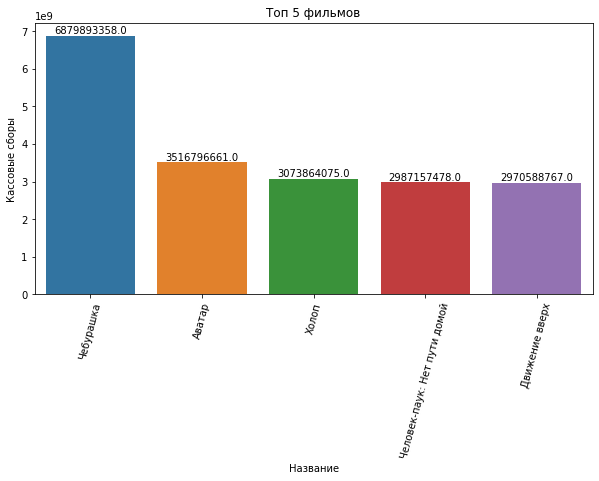

In [ ]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
#creating a bar plot
ax=sns.barplot(x='Название',y='Кассовые сборы, ₽',data=df1.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Название'],rotation=75)
#setting the title
ax.set_title("Топ 5 фильмов")
#setting the Y-axis labels
ax.set_ylabel("Кассовые сборы")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

<AxesSubplot:ylabel='Кассовые сборы, ₽'>

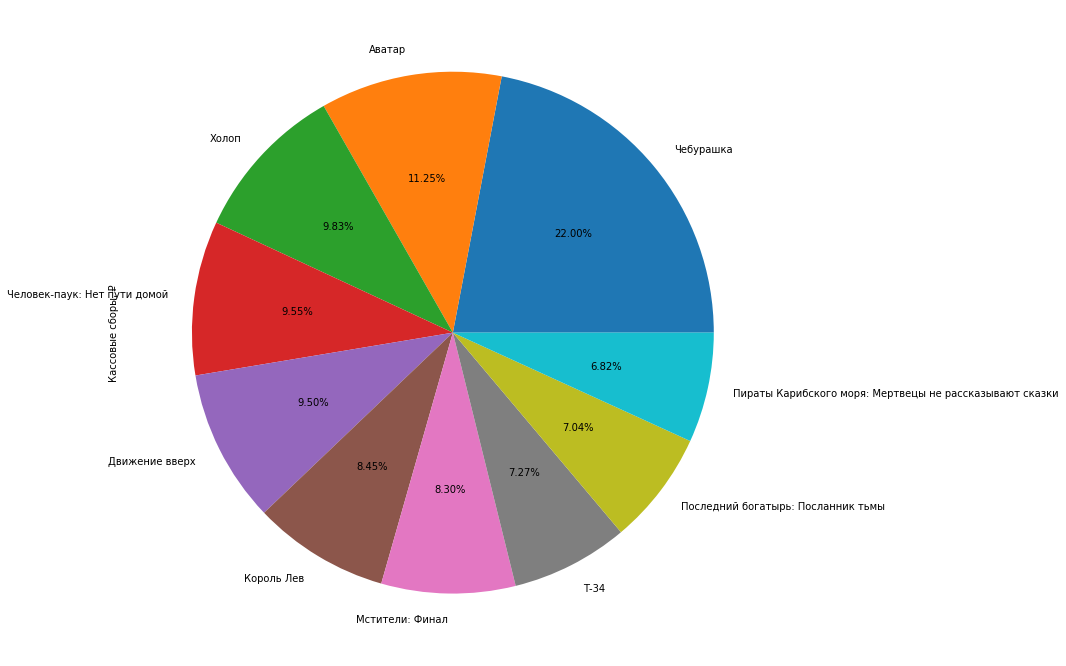

In [ ]:
df1['Кассовые сборы, ₽'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Название'],
figsize=(12,12))

<AxesSubplot:xlabel='Год'>

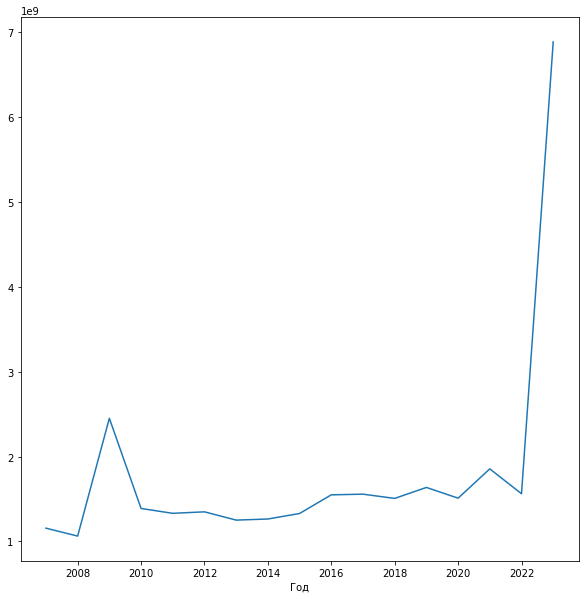

In [ ]:
#Aggregating the revenues by month
df2=df.groupby('Год')['Кассовые сборы, ₽'].mean()
#creating a line plot
df2.plot(kind='line',figsize=(10,10))

In [ ]:
# Вывод. Три самых прибыльных фильма: Чебурашка, Аватар, Холоп.

In [ ]:
spisok=df['Кассовые сборы, ₽'].tolist()
spisok

[6879893358,
 3516796661,
 3073864075,
 2987157478,
 2970588767,
 2641791506,
 2594826571,
 2273745807,
 2201581955,
 2131816926,
 2082859518,
 2055478462,
 2049717822,
 1992614872,
 1921830115,
 1919855364,
 1890425865,
 1882793307,
 1833685501,
 1719533343,
 1699657076,
 1696795264,
 1688520350,
 1672982876,
 1672296305,
 1666500000,
 1620750726,
 1610032115,
 1588307200,
 1566494894,
 1561741631,
 1555845727,
 1549977976,
 1548386369,
 1530137881,
 1517914413,
 1514414399,
 1511525876,
 1485768139,
 1480025694,
 1472444770,
 1470000000,
 1452746309,
 1443396514,
 1432265890,
 1428648768,
 1418505242,
 1397196086,
 1391072067,
 1383501046,
 1378866263,
 1361914256,
 1350000000,
 1322818669,
 1303115209,
 1298517507,
 1294237028,
 1290829879,
 1284738585,
 1281277239,
 1272064437,
 1251193808,
 1230792134,
 1230452545,
 1229980134,
 1225354742,
 1221271916,
 1221224803,
 1217548322,
 1208460770,
 1205272295,
 1176544102,
 1164101259,
 1156685306,
 1156546545,
 1155358009,
 1154418577,

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
seed(1)
data = 5 * randn (100) + 50
print('mean=%.3f stdv=%.3f' % (mean(spisok), std(spisok)))

mean=1551289667.650 stdv=720180878.726


<function matplotlib.pyplot.show(close=None, block=None)>

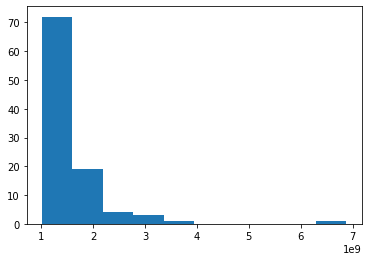

In [ ]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
seed(1)
data = 5 * randn (100) + 50
pyplot.hist(spisok)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

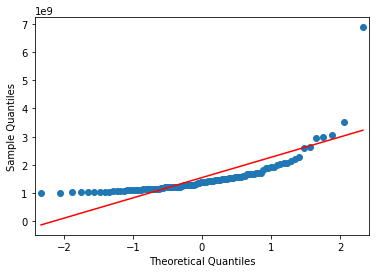

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import numpy
seed(1)
data = 5 * randn (100) + 50
arr = numpy.array(spisok)
qqplot(arr, line='s')
pyplot.show

In [ ]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
seed(1)
data = 5 * randn (100) + 50
stat, p = shapiro(spisok)
print('Statistics-%.3f, p-%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics-0.591, p-0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
seed(1)
data = 5 * randn (100) + 50
stat, p = normaltest(spisok)
print('Statistics-%.3f, p-%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics-131.457, p-0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
seed(1)
data = 5 * randn (100) + 50
result = anderson(spisok)
print('Statistics: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics: 9.201
15.000: 0.555, data does not look normal (reject H0)
10.000: 0.632, data does not look normal (reject H0)
5.000: 0.759, data does not look normal (reject H0)
2.500: 0.885, data does not look normal (reject H0)
1.000: 1.053, data does not look normal (reject H0)


# 2.3. Методы статистического анализа данных. Нормализация и стандартизация данных временных рядов

In [59]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url="http://pogoda-service.ru/archive_gsod_res.php?country=AU&station=111900&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=Посмотреть"
req=requests.get(url)
req.encoding = 'utf-8'
data=pd.read_html(req.text)
df=data[0]
df.head()

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,01.12.2010,-1.7,-3.0,-2.3,982.0,3.0,10,-6.1
1,02.12.2010,0.8,-5.4,-2.4,984.9,1.0,3,-4.9
2,03.12.2010,-1.2,-2.9,-2.1,986.2,4.0,7,-6.6
3,04.12.2010,-1.4,-9.5,-4.9,997.1,2.0,1,-8.4
4,05.12.2010,-2.3,-13.2,-6.3,993.6,3.0,0,-10.5


In [60]:
print(df.to_string())

           Дата  Максимальная температура  Минимальная температура  Средняя температура  Атмосферное давление  Скорость ветра  Осадки  Эффективная температура
0    01.12.2010                      -1.7                     -3.0                 -2.3                 982.0             3.0      10                     -6.1
1    02.12.2010                       0.8                     -5.4                 -2.4                 984.9             1.0       3                     -4.9
2    03.12.2010                      -1.2                     -2.9                 -2.1                 986.2             4.0       7                     -6.6
3    04.12.2010                      -1.4                     -9.5                 -4.9                 997.1             2.0       1                     -8.4
4    05.12.2010                      -2.3                    -13.2                 -6.3                 993.6             3.0       0                    -10.5
5    06.12.2010                      -1.7     

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Дата                      1000 non-null   object 
 1   Максимальная температура  1000 non-null   float64
 2   Минимальная температура   1000 non-null   float64
 3   Средняя температура       1000 non-null   float64
 4   Атмосферное давление      1000 non-null   float64
 5   Скорость ветра            999 non-null    float64
 6   Осадки                    1000 non-null   int64  
 7   Эффективная температура   999 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [62]:
df1=df[['Дата','Средняя температура']]
df1

,Дата,Средняя температура
0,01.12.2010,-2.3
1,02.12.2010,-2.4
2,03.12.2010,-2.1
3,04.12.2010,-4.9
4,05.12.2010,-6.3
...,...,...
995,22.08.2013,18.9
996,23.08.2013,20.2
997,24.08.2013,17.8
998,25.08.2013,16.2


In [63]:
df1['Дата']=pd.to_datetime(df1['Дата'], format='%d.%m.%Y')

<ipython-input-63-63a9c59ce416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Дата']=pd.to_datetime(df1['Дата'], format='%d.%m.%Y')


In [64]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 1000 non-null   datetime64[ns]
 1   Средняя температура  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


,Дата,Средняя температура
0,2010-12-01,-2.3
1,2010-12-02,-2.4
2,2010-12-03,-2.1
3,2010-12-04,-4.9
4,2010-12-05,-6.3
...,...,...
995,2013-08-22,18.9
996,2013-08-23,20.2
997,2013-08-24,17.8
998,2013-08-25,16.2


In [65]:
from google.colab import files
df1.to_csv('dataset.csv', encoding = 'utf-8-sig') 
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# Нормализация временных рядов
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
series = read_csv('dataset1.csv', header=0, index_col=0)
print(series.head())

            Date,"Temp"
2010-12-01         -2.3
2010-12-02         -2.4
2010-12-03         -2.1
2010-12-04         -4.9
2010-12-05         -6.3


In [67]:
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

Min: -11.600000, Max: 30.500000
[0.22090261]
[0.21852732]
[0.22565321]
[0.15914489]
[0.12589074]
[-2.3]
[-2.4]
[-2.1]
[-4.9]
[-6.3]


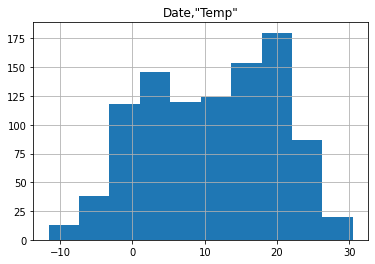

In [68]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset1.csv', header=0, index_col=0)
series.hist()
pyplot.show()

In [69]:
# Нормализация временных рядов
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt
series = read_csv('dataset1.csv', header=0, index_col=0)
print(series.head())
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

            Date,"Temp"
2010-12-01         -2.3
2010-12-02         -2.4
2010-12-03         -2.1
2010-12-04         -4.9
2010-12-05         -6.3
Mean: 10.960900, StandardDeviation: 9.048445
[-1.46554459]
[-1.47659622]
[-1.44344135]
[-1.75288678]
[-1.90760949]
[-2.3]
[-2.4]
[-2.1]
[-4.9]
[-6.3]


In [70]:
#Вывод: минимальное значение (min) - -11,6; максимальное значение (max) - 30,5; среднее значение (mean) - 10,96; стандартное отклонение (standardDeviation) - 9,048.